# Fragile Family Challenge

## Introduction

Verbatim from Fragile Families Challenge website:

- The Fragile Families & Child Wellbeing Study is following a cohort of nearly 5,000 children born in large U.S. cities between 1998 and 2000, roughly three-quarters of whom were born to unmarried parents. We refer to unmarried parents and their children as “fragile families” to underscore that they are families and that they are at greater risk of breaking up and living in poverty than more traditional families.

- The core Study was originally designed to primarily address four questions of great interest to researchers and policy makers: (1) What are the conditions and capabilities of unmarried parents, especially fathers?; (2) What is the nature of the relationshipsbetween unmarried parents?; (3) How do children born into these families fare?; and (4) How do policies and environmental conditions affect families and children?  

- The core Study consists of interviews with both mothers and fathers at birth and again when children are ages one, three, five, and nine. The parent interviews collect information on attitudes, relationships, parenting behavior, demographic characteristics, health (mental and physical), economic and employment status, neighborhood characteristics, and program participation. Additionally, in-home assessments of children and their home environments were conducted at ages three, five, and nine. The in-home interview collects information on children’s cognitive and emotional development, health, and home environment. Several collaborative studies provide additional information on parents’ medical, employment and incarceration histories, religion, child care and early childhood education. A fifteen-year follow-up wave includes a collection of in-home and telephone survey data from caregivers and teens.

## Problem Description
You are provided with all the data set from the years 1 through 9. There are some training data from year 15, the goal of this project is to predict six key outcomes in the year 15. The six key outcomes are - grit, GPA, material hardness, eviction, job loss, and job training. These include 3 binary and three continuous outcomes. GPA, Grit and material hardship are continuous outcomes. House eviction, layoffs of caregiver, job training of a caregiver are binary outcomes.

## Data Description

The `input_files` folder contains three comma-separated values files, a text codebook file, a Stata .dta file that contains the data with variable and value labels, and a text file identifying features that are constant.

---
- background.csv contains 4,242 rows (one per family) and 13,027 columns
- background.dta contains the same information, plus variable and value labels, in a Stata data file.

These files contain:

challengeID: A unique numeric identifier for each child.

13,026 background variables asked from birth to age 9, which you may use in building your model.

---
- train.csv contains 2,121 rows (one per child in the training set) and 7 columns.

These are the outcome variables measured at approximately child age 15, which you can use to train your models.

The file contains:

challengeID: A unique numeric identifier for each child.

Six outcome variables. Blog posts about the outcomes are available at http://www.fragilefamilieschallenge.org/blog-posts/

Continuous variables: grit, gpa, materialHardship

Binary variables: eviction, layoff, jobTraining

---
- codebook_FFChallenge.txt is a text file that contains the codebook for all variables in the Challenge data file. This combines several codebooks from the main Fragile Families and Child Wellbeing Study documentation.

---
- constantVariables.txt gives the column names of variables that are constant in the data. Some of these variables are constant because they have been redacted out of concern for the privacy of respondents. 

## Solution Approach
As a first step we remove the constant columns to ease the computation and remove non-contributing features


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the background information into pandas
BACKGROUND_FILE = './input_files/background.csv'
background_data = pd.read_csv(BACKGROUND_FILE, low_memory=False) #Certain columns have mixed data type
background_data.head()

,challengeID,cf1intmon,cf1intyr,cf1lenhr,cf1lenmin,cf1twoc,cf1fint,cf1natsm,f1natwt,cf1natsmx,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
0,1,-3,-3,-9,-9,-3,0,-3,-3,-3,...,6.269946,5.180325,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
1,2,-3,-3,0,40,-3,1,-3,-3,-3,...,6.269946,27.680196,2.511131,1.718804,6.473537,16.369411,26.671897,9.628369,15.981275,3.667679
2,3,-3,-3,0,45,-3,1,-3,-3,-3,...,6.269946,5.180325,20.867881,24.115867,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
3,4,-3,-3,0,45,-3,1,-3,-3,-3,...,6.269946,5.180325,22.018875,22.932641,6.473537,-5.169243,4.476881,9.628369,-6.303171,4.140511
4,5,-3,-3,-6,50,-3,1,-3,-3,-3,...,6.269946,5.180325,22.916602,22.988036,6.473537,-6.034660,4.476881,9.628369,-6.211828,3.668879


In [3]:
# Read the constant variable file to get the column headers for constant variables. Remove the constant columns
CONSTANT_VARIABLES_FILE = './input_files/ConstantVariables.txt'
constant_vars = np.loadtxt(CONSTANT_VARIABLES_FILE, dtype='str').flatten()
background_data.drop(constant_vars, axis=1, inplace=True)
background_data.head()

,challengeID,cf1lenhr,cf1lenmin,cf1fint,cf1citsm,f1citywt,f1a2,f1a3,f1a4,f1a4a,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
0,1,-9,-9,0,-9,-3.000000,-9,-9,-9,-9,...,6.269946,5.180325,2.511131,1.718804,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
1,2,0,40,1,1,68.455658,2,1,1,-6,...,6.269946,27.680196,2.511131,1.718804,6.473537,16.369411,26.671897,9.628369,15.981275,3.667679
2,3,0,45,1,1,42.319057,1,1,1,-6,...,6.269946,5.180325,20.867881,24.115867,6.473537,16.369411,4.476881,9.628369,15.981275,24.038266
3,4,0,45,1,1,25.628830,1,1,1,-6,...,6.269946,5.180325,22.018875,22.932641,6.473537,-5.169243,4.476881,9.628369,-6.303171,4.140511
4,5,-6,50,1,1,41.954487,2,1,1,-6,...,6.269946,5.180325,22.916602,22.988036,6.473537,-6.034660,4.476881,9.628369,-6.211828,3.668879


In [4]:
# Read the data set into a pandas dataframe
OUTCOME_FILE= './input_files/train.csv'
outcome_data = pd.read_csv(OUTCOME_FILE)
outcome_data.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,3.50,0.090909,0.0,0.0,0.0
3,7,2.5,3.25,0.000000,0.0,0.0,0.0
4,8,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove NaNs
outcome_data.dropna(inplace=True, axis=0)
outcome_data.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
3,7,2.50,3.25,0.000000,0.0,0.0,0.0
5,9,2.25,4.00,0.181818,0.0,0.0,0.0
7,13,2.75,4.00,0.181818,0.0,0.0,1.0
8,14,3.25,2.75,0.272727,0.0,1.0,0.0
9,16,2.00,3.50,0.090909,0.0,0.0,1.0


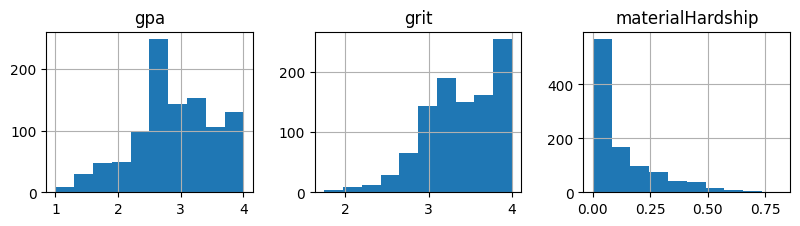

In [6]:
# Visualize the data using pair-plot
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the histogram of continuous labels
hist_continuos = (outcome_data[['gpa', 'grit', 'materialHardship']]).hist(bins=10, figsize=(9.6, 4.8), layout = (2, 3))

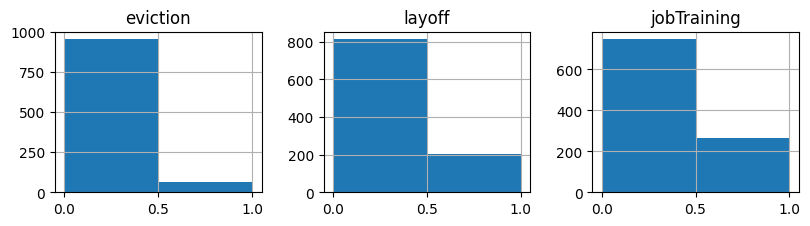

In [7]:
# Plot the histogram of binary labels
hist_binary = (outcome_data[['eviction', 'layoff', 'jobTraining']]).hist(bins=2, figsize=(9.6, 4.8), layout = (2, 3))

### NOTE: From the above histogram it can be expected that for the classification problem, the classes are not balanced

## GPA prediction

The approach we would follow in this project is to predict one outcome at a time. As a first step we would focus on predicting the GPA from the survey data. Since we no longer have access to the leaderboard (the competition is closed), we would split the complete data set into training and test data sets

In [8]:
# complete_gpa_datasetonly those rows in the background dataframe for which we have labeled gpa outcomes
gpa_outcome = (pd.read_csv(OUTCOME_FILE, usecols=['challengeID', 'gpa']))
gpa_outcome.dropna(inplace=True, axis=0)

display(gpa_outcome.head())
complete_gpa_dataset =pd.merge(background_data, gpa_outcome, how='inner', on=['challengeID'])
complete_gpa_dataset.dropna(inplace=True, axis=1)
complete_gpa_dataset.head()

,challengeID,gpa
3,7,2.50
5,9,2.25
6,10,3.25
7,13,2.75
8,14,3.25


,challengeID,cf1lenhr,cf1lenmin,cf1fint,cf1citsm,f1citywt,f1a2,f1a3,f1a4,f1a4a,...,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1,gpa
0,7,0,45,1,1,706.841492,1,1,1,-6,...,5.180325,22.307181,23.471265,6.473537,-5.424175,4.476881,9.628369,-5.812319,4.627115,2.50
1,9,-3,55,1,1,100.403282,1,1,1,-6,...,5.180325,23.558317,22.970998,6.473537,-5.648850,4.476881,9.628369,-5.967682,3.424922,2.25
2,10,0,45,1,1,7.728454,1,1,1,-6,...,5.180325,2.511131,1.718804,6.473537,16.369411,26.287101,9.628369,15.981275,4.151350,3.25
3,13,0,55,1,1,7.735482,1,1,1,-6,...,5.180325,2.511131,1.718804,28.736545,16.369411,26.216141,9.628369,15.981275,3.424922,2.75
4,14,0,40,1,1,203.355545,1,1,1,-6,...,5.180325,23.199550,23.514938,6.473537,-5.152093,4.476881,9.628369,-5.560125,3.662207,3.25


In [9]:
complete_gpa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1164
Columns: 10481 entries, challengeID to gpa
dtypes: float64(541), int64(9939), object(1)
memory usage: 93.2+ MB


### Note: We find that one feature is of type 'object' which is likely to be string. Let us explore that

In [10]:
# We identify columns with non-numeric values to decide whether to keep them or not
str_cols = [col for col in complete_gpa_dataset.columns if complete_gpa_dataset[col].dtype == 'object']
str_type_cols = complete_gpa_dataset[str_cols].copy()
display(str_type_cols.head())

print(str_type_cols['cf4fint'].unique())

# 

,cf4fint
0,1960-01-02
1,1960-01-02
2,1960-01-02
3,1960-01-02
4,1960-01-02


['1960-01-02' '1960-01-01']


Since the column is simply the date on which the father was interviewed, it is probably not useful so we can drop it

In [11]:
# Split the complete data set into features and labels
X = (complete_gpa_dataset.iloc[:,1:-1].copy()).drop(str_cols, axis=1)
y = complete_gpa_dataset.iloc[:,-1].copy()
display(X.head())
display(y.head())

,cf1lenhr,cf1lenmin,cf1fint,cf1citsm,f1citywt,f1a2,f1a3,f1a4,f1a4a,f1a5,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
0,0,45,1,1,706.841492,1,1,1,-6,-2,...,6.269946,5.180325,22.307181,23.471265,6.473537,-5.424175,4.476881,9.628369,-5.812319,4.627115
1,-3,55,1,1,100.403282,1,1,1,-6,1,...,6.269946,5.180325,23.558317,22.970998,6.473537,-5.648850,4.476881,9.628369,-5.967682,3.424922
2,0,45,1,1,7.728454,1,1,1,-6,1,...,6.269946,5.180325,2.511131,1.718804,6.473537,16.369411,26.287101,9.628369,15.981275,4.151350
3,0,55,1,1,7.735482,1,1,1,-6,1,...,29.259295,5.180325,2.511131,1.718804,28.736545,16.369411,26.216141,9.628369,15.981275,3.424922
4,0,40,1,1,203.355545,1,1,1,-6,1,...,6.269946,5.180325,23.199550,23.514938,6.473537,-5.152093,4.476881,9.628369,-5.560125,3.662207


0    2.50
1    2.25
2    3.25
3    2.75
4    3.25
Name: gpa, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Output the head and the shape
display(X_train.head(), X_test.head(), X_train.shape, X_test.shape)
display(y_train.head(), y_test.head(), y_train.shape, y_test.shape)


,cf1lenhr,cf1lenmin,cf1fint,cf1citsm,f1citywt,f1a2,f1a3,f1a4,f1a4a,f1a5,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
523,-9,-9,0,-9,-3.000000,-9,-9,-9,-9,-9,...,6.269946,5.180325,2.511131,1.718804,6.473537,16.369411,27.244011,9.628369,15.981275,3.656543
295,0,45,1,1,77.424721,1,1,1,-6,1,...,28.736879,26.990283,2.511131,1.718804,28.532858,16.369411,26.479213,9.628369,15.981275,4.623460
916,0,45,1,1,10.359114,1,1,1,-6,1,...,6.269946,5.180325,19.409765,23.514938,6.473537,16.369411,4.476881,9.628369,15.981275,3.424922
851,-6,-6,1,1,15.775953,2,1,1,-6,1,...,6.269946,5.180325,2.511131,1.718804,6.473537,16.369411,26.024030,9.628369,15.981275,3.656543
97,0,48,1,1,19.284414,1,1,1,-6,1,...,6.269946,26.990283,2.511131,1.718804,6.473537,16.369411,26.287101,9.628369,15.981275,3.424922


,cf1lenhr,cf1lenmin,cf1fint,cf1citsm,f1citywt,f1a2,f1a3,f1a4,f1a4a,f1a5,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
918,0,39,1,1,41.400322,1,1,-3,2,2,...,6.269946,26.990283,2.511131,1.718804,6.473537,16.369411,26.287101,9.628369,15.981275,5.843237
592,0,45,1,1,833.136230,1,1,1,-6,1,...,6.269946,5.180325,21.921135,24.507672,6.473537,-5.903519,4.476881,9.628369,-6.429897,3.668064
108,0,23,1,1,29.977249,1,1,1,-6,1,...,29.511374,27.389101,2.511131,1.718804,28.682328,16.369411,26.287101,9.628369,15.981275,4.143642
837,0,55,1,1,11.944592,1,1,1,-6,1,...,6.269946,5.180325,23.216273,21.923256,6.473537,-5.827102,4.476881,9.628369,-5.727972,3.424922
1138,1,0,1,1,404.416046,1,1,1,-6,1,...,28.408407,27.309260,2.511131,1.718804,28.179191,16.369411,26.337857,9.628369,-5.264301,3.665748


(932, 10478)

(233, 10478)

523    3.00
295    1.75
916    2.50
851    2.25
97     1.50
Name: gpa, dtype: float64

918     2.25
592     3.75
108     3.75
837     2.25
1138    3.75
Name: gpa, dtype: float64

(932,)

(233,)

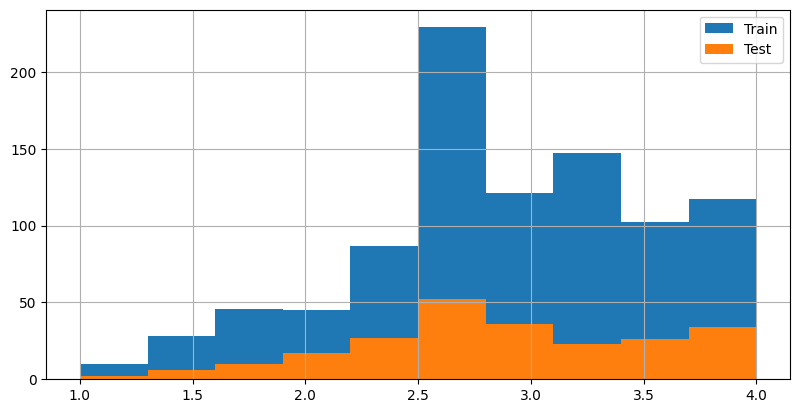

In [14]:
# Visually check if the distribution of data set is similar for both the training and test set
%matplotlib inline

plt.figure(figsize=(10,8))
hist_continuos = (y_train.hist(bins=10, figsize=(9.6, 4.8), label='Train'))
hist_continuos = (y_test.hist(bins=10, figsize=(9.6, 4.8), label='Test'))
plt.legend(loc='best')

The distribution looks representative

In [15]:
# Standardize the data set
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mm_sc = MinMaxScaler()
X_train = mm_sc.fit_transform(X_train)
X_test = mm_sc.transform(X_test)

### Next we try to identify the key features

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_PCA = pca.fit_transform(X_train)

In [29]:
explained_variance = pca.explained_variance_ratio_/max(pca.explained_variance_ratio_)
explained_variance = explained_variance[explained_variance > 0.05]

In [30]:
n_features = len(explained_variance)
print(n_features)

20


In [31]:
X_test_PCA = pca.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=0)
regressor.fit(X_train_PCA, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test_PCA)

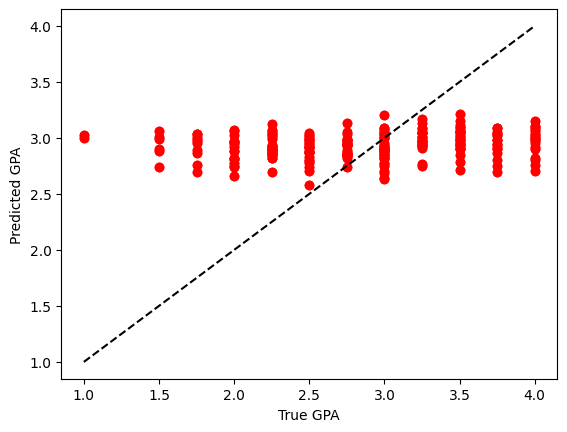

In [33]:
fig, axs = plt.subplots(1,1, figsize=(6.4, 4.8))

plt.scatter(y_test, y_pred, marker='o', color='red')
y_min, y_max = np.min(np.array([np.min(y_pred),np.min(y_test)])), np.max(np.array([np.max(y_pred),np.max(y_test)]))

plt.scatter(y_test, y_pred, marker='o', color='red')
plt.xlabel('True GPA')
plt.ylabel('Predicted GPA')
plt.plot(np.linspace(y_min, y_max, 100), np.linspace(y_min, y_max, 100), c='k', ls ='--')

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [35]:
mean_absolute_error(y_test,y_pred)

0.5464085501515717

In [36]:
rmse_error = np.sqrt(mean_squared_error(y_test,y_pred))
rmse_error

0.6721761175516399

In [37]:
explained_variance_score(y_test,y_pred)

0.030879711944184374

# Neural Network Approach

In this section, we train the same training set using a deep learning model and compare performance with random forest regressor

In [ ]:
# Standardize the data set
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mm_sc = MinMaxScaler()
X_train = mm_sc.fit_transform(X_train)
X_test = mm_sc.transform(X_test)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

2022-09-10 22:55:46.504549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-10 22:55:46.504652: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [52]:
X_train_PCA.shape

(932, 932)

In [188]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [193]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

n = 932

# input layer
model.add(Dense(n,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(units=1,activation='relu'))

# Compile mode
model.compile(loss='mse', optimizer='adam')

In [194]:
model.fit(x=X_train_PCA, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test_PCA, y_test), 
          callbacks=[early_stop]
          )

Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 1.0936 - val_loss: 0.6722
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 0.3010 - val_loss: 0.5176
Epoch 3/50
30/30 [==============================] - 0s 8ms/step - loss: 0.1112 - val_loss: 0.5326


In [195]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

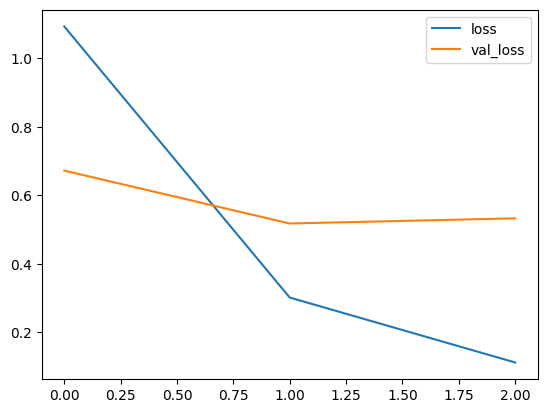

In [196]:
losses[['loss','val_loss']].plot()

In [197]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [198]:
predictions = model.predict(X_test_PCA)

8/8 [==============================] - 0s 3ms/step


In [199]:
mean_absolute_error(y_test,predictions)

0.5757747407634882

In [200]:
rmse_error = np.sqrt(mean_squared_error(y_test,predictions))
rmse_error

0.7298259824992201

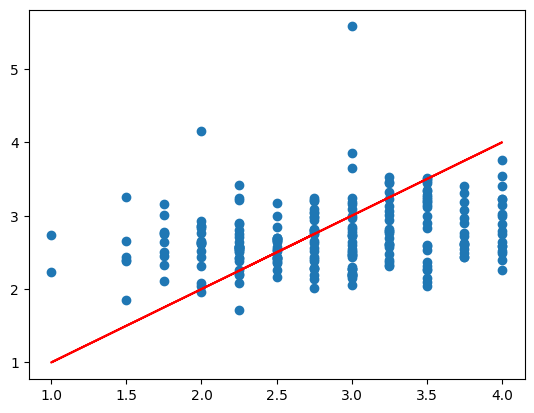

In [201]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

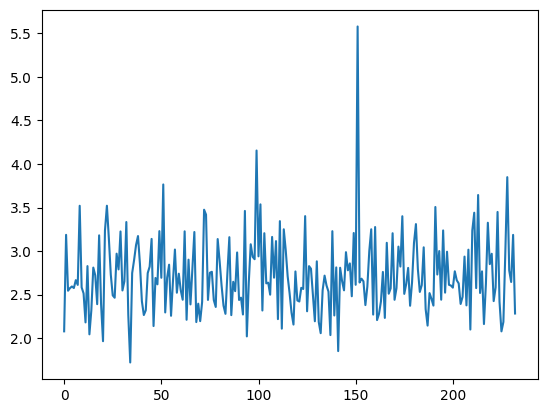

In [202]:
plt.plot(predictions)